In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
ls

 Animal_Dataset.zip   haarcascade_frontalface_alt.xml   Untitled0.ipynb
 dataset/            'Srikanth (1)'@


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

# Image Augmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as mpimg
import matplotlib.pyplot as plt
import random
from skimage import exposure
from skimage .util import random_noise
from skimage import transform
from cv2 import resize

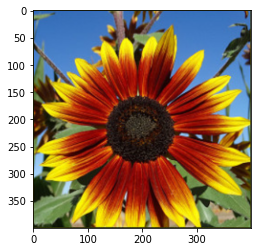

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/day-9-dataset/CNN/flowers/sunflower/10386503264_e05387e1f7_m.jpg')
plt.imshow(img)
img_rescale=resize(img,(400,400))
plt.imshow(img_rescale)

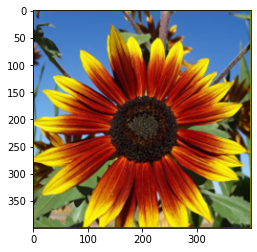

In [ ]:
#horizontal flip
horiz = np.fliplr(img_rescale)
plt.imshow(horiz)

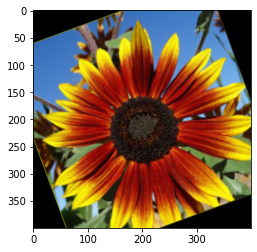

In [ ]:
# rotate
from skimage import transform
trans = transform.rotate(img_rescale , random.uniform(-30,30))
plt.imshow(trans)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1/255,horizontal_flip = True,vertical_flip = True,zoom_range= 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/CNN/dataset/Training' ,target_size = (62,62),
                                            class_mode = 'categorical',batch_size = 24)

Found 1238 images belonging to 4 classes.


In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/CNN/dataset/Testing' ,target_size = (62,62),
                                            class_mode = 'categorical',batch_size = 24)

Found 326 images belonging to 4 classes.


 # Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (62,62,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation = 'relu'))

In [ ]:
model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 28800)             0         
                                                                 
 dense_7 (Dense)             (None, 300)               8640300   
                                                                 
 dense_8 (Dense)             (None, 4)                 1204      
                                                                 
Total params: 8,642,400
Trainable params: 8,642,400
Non-trainable params: 0
____________________________________________

In [ ]:
len(x_train)

14

# Compile the model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics =["accuracy"], optimizer= 'adam')

# Fit the model

In [ ]:
model.fit_generator(x_train,validation_data=x_train,epochs=5, steps_per_epoch=len(x_train), validation_steps=len(x_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
14/14 [==============================] - 53s 4s/step - loss: 5.6963 - accuracy: 0.2239 - val_loss: 1.9208 - val_accuracy: 0.2301
Epoch 2/5
14/14 [==============================] - 7s 510ms/step - loss: 1.4907 - accuracy: 0.2822 - val_loss: 1.3885 - val_accuracy: 0.3620
Epoch 3/5
14/14 [==============================] - 9s 639ms/step - loss: 1.3146 - accuracy: 0.3712 - val_loss: 1.2357 - val_accuracy: 0.4601
Epoch 4/5
14/14 [==============================] - 7s 497ms/step - loss: 1.2136 - accuracy: 0.4724 - val_loss: 1.1224 - val_accuracy: 0.5675
Epoch 5/5
14/14 [==============================] - 7s 481ms/step - loss: 1.1045 - accuracy: 0.5399 - val_loss: 1.0043 - val_accuracy: 0.6012


# Save the model

In [ ]:
model.save('Animal_dataset')

# Testing the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [ ]:
score = model.evaluate(x_train, verbose=1)
print('\n', 'Test accuracy:', score[1])

14/14 [==============================] - 5s 322ms/step - loss: 0.9902 - accuracy: 0.6104

 Test accuracy: 0.6104294657707214
